In [10]:
import h5py
import matplotlib.pyplot as plt
from pathlib import Path

root = Path('../nano-pelican-testing')
file = h5py.File(root / 'long-0' /'model_metrics.h5', 'r')
print(file.keys())

<KeysViewHDF5 ['model.best_acc.keras', 'model.best_loss.keras', 'model.keras', 'runtime']>


### Runtime stats ###

In [11]:
runtime = file['runtime']
print(runtime.keys())

<KeysViewHDF5 ['acc', 'loss', 'val_acc', 'val_loss']>


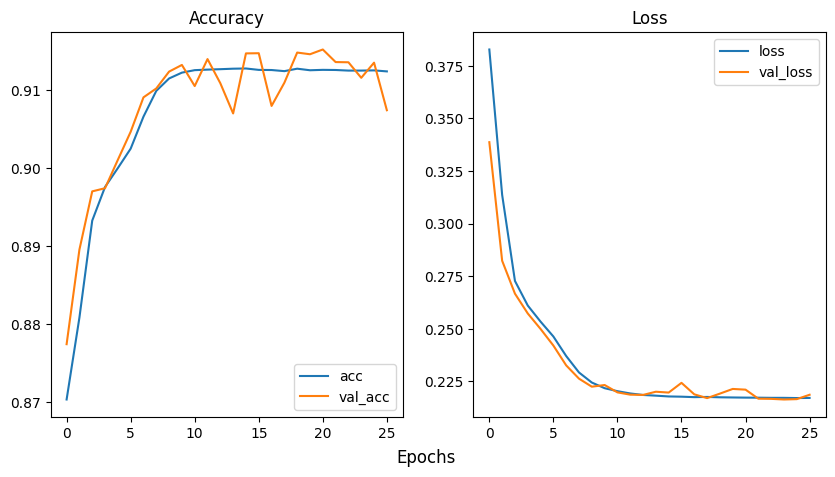

In [12]:
def generate_plot(file):
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 5))
    for key in file.keys():
        if 'acc' in key:
            axL.plot(file[key][:], label=key)

        if 'loss' in key:
            axR.plot(file[key][:], label=key)

    axL.set_title('Accuracy')
    axL.legend(loc='lower right')

    axR.set_title('Loss')
    axR.legend()
    fig.supxlabel('Epochs')
    return fig

fig = generate_plot(runtime)



### Test performance ###

In [13]:
models = []
for key in file.keys():
    if not '.keras' in key:
        continue
    models.append(file[key])

print(models)

[<HDF5 group "/model.best_acc.keras" (1 members)>, <HDF5 group "/model.best_loss.keras" (1 members)>, <HDF5 group "/model.keras" (1 members)>]


#### AUC ###

In [14]:
from sklearn.metrics import auc

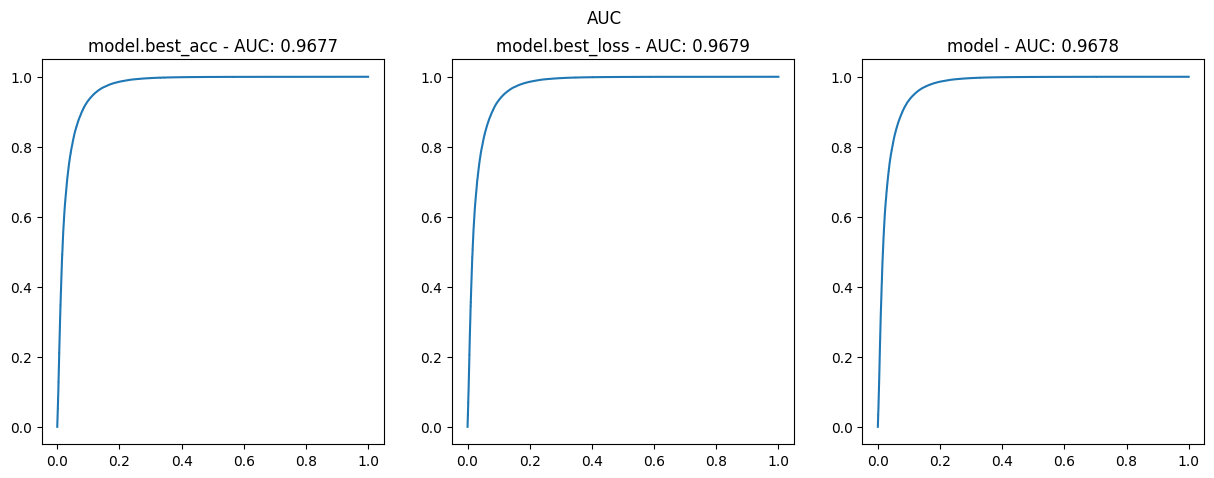

In [15]:
fig, axes = plt.subplots(ncols=len(models), figsize=(5*len(models), 5))
fig.suptitle("AUC")

for model, ax in zip(models, axes):
    data = model['auc']
    tpr, fpr = data['tpr'][:], data['fpr'][:]
    ax.plot(fpr, tpr)

    score = auc(fpr, tpr)
    score = round(score, 4)

    ax.set_title(f'{model.name[1:-6]} - AUC: {score}')

### Test metrics ###

In [16]:
import pandas as pd
test_data = pd.read_csv(root / 'eval-.csv')
test_data = test_data[test_data.num_particles==32]

In [17]:
for name, group in test_data.groupby('Name'):
    print(name)
    print(group.groupby('n_hidden').mean(numeric_only=True))

model.best_acc.keras
          num_particles       acc       auc      loss
n_hidden                                             
2                  32.0  0.916611  0.967664  0.219331
model.best_loss.keras
          num_particles       acc       auc      loss
n_hidden                                             
2                  32.0  0.912547  0.967876  0.215027
model.keras
          num_particles       acc       auc      loss
n_hidden                                             
2                  32.0  0.911879  0.967769  0.215297
